<a href="https://colab.research.google.com/github/ainesko/NGS-HW/blob/main/NGS7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Скачивание файлов с диска


In [1]:
def download_from_disk(id):
  import gdown
  gdown.download(f'https://drive.google.com/uc?id={id}&confirm=t', quiet=False)

In [2]:
download_from_disk('1yfAxn28oxJkYtuggqfwETNGvuW3LzXZz')

Downloading...
From: https://drive.google.com/uc?id=1yfAxn28oxJkYtuggqfwETNGvuW3LzXZz&confirm=t
To: /content/genes.gtf.gz
100%|██████████| 549k/549k [00:00<00:00, 51.0MB/s]


In [3]:
download_from_disk('1bOTJBrYFSXOZ95dFMAOqvrc9SQbaAiRE')

Downloading...
From: https://drive.google.com/uc?id=1bOTJBrYFSXOZ95dFMAOqvrc9SQbaAiRE&confirm=t
To: /content/ref.fa.gz
100%|██████████| 3.78M/3.78M [00:00<00:00, 57.5MB/s]


In [4]:
download_from_disk('10y635S0z2SI30fWYkHxNeSmrGbgmLd98')

Downloading...
From: https://drive.google.com/uc?id=10y635S0z2SI30fWYkHxNeSmrGbgmLd98&confirm=t
To: /content/SRR453566_1.fastq.gz
100%|██████████| 434M/434M [00:03<00:00, 132MB/s]


In [5]:
download_from_disk('1lRhvmzIooMMLn872Gg9Covdts3o3UFoS')

Downloading...
From: https://drive.google.com/uc?id=1lRhvmzIooMMLn872Gg9Covdts3o3UFoS&confirm=t
To: /content/SRR453566_2.fastq.gz
100%|██████████| 465M/465M [00:04<00:00, 109MB/s]


# Установка программ

In [6]:
!pip install -q condacolab

In [7]:
import condacolab

In [8]:
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:31
🔁 Restarting kernel...


In [9]:
!conda install -c bioconda hisat2

Solving environment: | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - hisat2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.5.18.1|       ha878542_0         144 KB  conda-forge
    certifi-2022.5.18.1        |   py37h89c1867_0         150 KB  conda-forge
    conda-4.12.0               |   py37h89c1867_0         1.0 MB  conda-forge
    hisat2-2.2.1               |       h1b792b2_3        16.5 MB  bioconda
    perl-5.32.1                | 0_h7f98852_perl5        14.5 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        32.2 MB

The following NEW packages will be INSTALLED:

  hisat2             bioconda/linux-64::hisat2-2.2.1-h1b792b2_3
  

In [10]:
!conda install -c bioconda spades

Solving environment: - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - spades


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    spades-3.13.0              |                0        13.7 MB  bioconda
    ------------------------------------------------------------
                                           Total:        13.7 MB

The following NEW packages will be INSTALLED:

  spades             bioconda/linux-64::spades-3.13.0-0



spades-3.13.0        | 13.7 MB   | : 100% 1.0/1 [00:04<00:00,  4.22s/it]              
Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done


# 1. Выравнивание ридов RNA-Seq

In [1]:
!gunzip ref.fa.gz

In [2]:
!gunzip SRR453566_1.fastq.gz

In [3]:
!gunzip SRR453566_2.fastq.gz

In [4]:
!hisat2-build ref.fa genome

Settings:
  Output files: "genome.*.ht2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Local offset rate: 3 (one in 8)
  Local fTable chars: 6
  Local sequence length: 57344
  Local sequence overlap between two consecutive indexes: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ref.fa
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
  Time to read SNPs and splice sites: 00:00:00
Using parameters --bmax 2279457 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 2279457 --dcv 1024
Constructing suffix-array element generator
Buildi

In [5]:
!hisat2 -x genome -1 SRR453566_1.fastq -2 SRR453566_2.fastq -S output.sam

5725730 reads; of these:
  5725730 (100.00%) were paired; of these:
    1190825 (20.80%) aligned concordantly 0 times
    4291355 (74.95%) aligned concordantly exactly 1 time
    243550 (4.25%) aligned concordantly >1 times
    ----
    1190825 pairs aligned concordantly 0 times; of these:
      136484 (11.46%) aligned discordantly 1 time
    ----
    1054341 pairs aligned 0 times concordantly or discordantly; of these:
      2108682 mates make up the pairs; of these:
        1419213 (67.30%) aligned 0 times
        637765 (30.24%) aligned exactly 1 time
        51704 (2.45%) aligned >1 times
87.61% overall alignment rate


# 2. Оценка количества экспрессирующихся генов

In [ ]:
!pip install pysam

In [ ]:
!pip install Bio

In [ ]:
!pip install gffutils

In [ ]:
!conda install tpmcalculator

Опять что-то не так пошло с работой в колабе (ну а QUAST у меня не дружит с jupyter notebook), поэтому я загружу уже готовые результаты выполнения программы

!TPMCalculator -g genes.gtf -b output_sorted.bam

In [ ]:
!wget https://github.com/ainesko/NGS-HW/blob/main/HW7/output_sorted_genes.uni

In [48]:
with open('output_sorted_genes.uni', 'r') as f:
  l = [line.strip() for line in f]
  tmp = []
  for i in range(1, len(l)):
    s = l[i].split('\t')
    tmp.append(round(float(s[8]), 1))

In [59]:
tmp.sort()
s = []
counts = []
for num in tmp:
  if num not in s:
    s.append(num)
    counts.append(tmp.count((num)))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

Распределение TMP

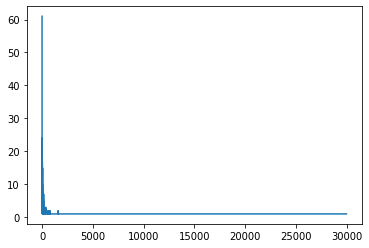

In [58]:
plt.plot(s, counts)
plt.show()

In [65]:
len(tmp)

7433

Число генов со значением TMP > p

In [80]:
def expr(p):
    i = 0
    for t in tmp:
      if t > p:
        i += 1
    print(i)

In [81]:
expr(5)

6445


In [82]:
expr(20)

3942


# 3. Сборка de novo

In [ ]:
!spades.py --rna -1 SRR453566_1.fastq -2 SRR453566_2.fastq -o output_dir

Результаты сборки были скачаны на гитхаб для дальнейшей работы

In [ ]:
!wget https://raw.githubusercontent.com/ainesko/NGS-HW/main/HW7/transcripts.fasta

In [ ]:
!conda create -n env_full conda=4.9.2
!conda activate env_full
!conda install -c bioconda rnaquast
!rnaquast.py -r ref.fa --gtf genes.gtf -c output_dir/transcripts.fasta

In [ ]:
!wget https://github.com/ainesko/NGS-HW/blob/main/HW7/short_report.txt

In [ ]:
!wget https://github.com/ainesko/NGS-HW/blob/main/HW7/short_report.pdf

Результаты есть в гитхабе, часть отчёта в pdf ниже

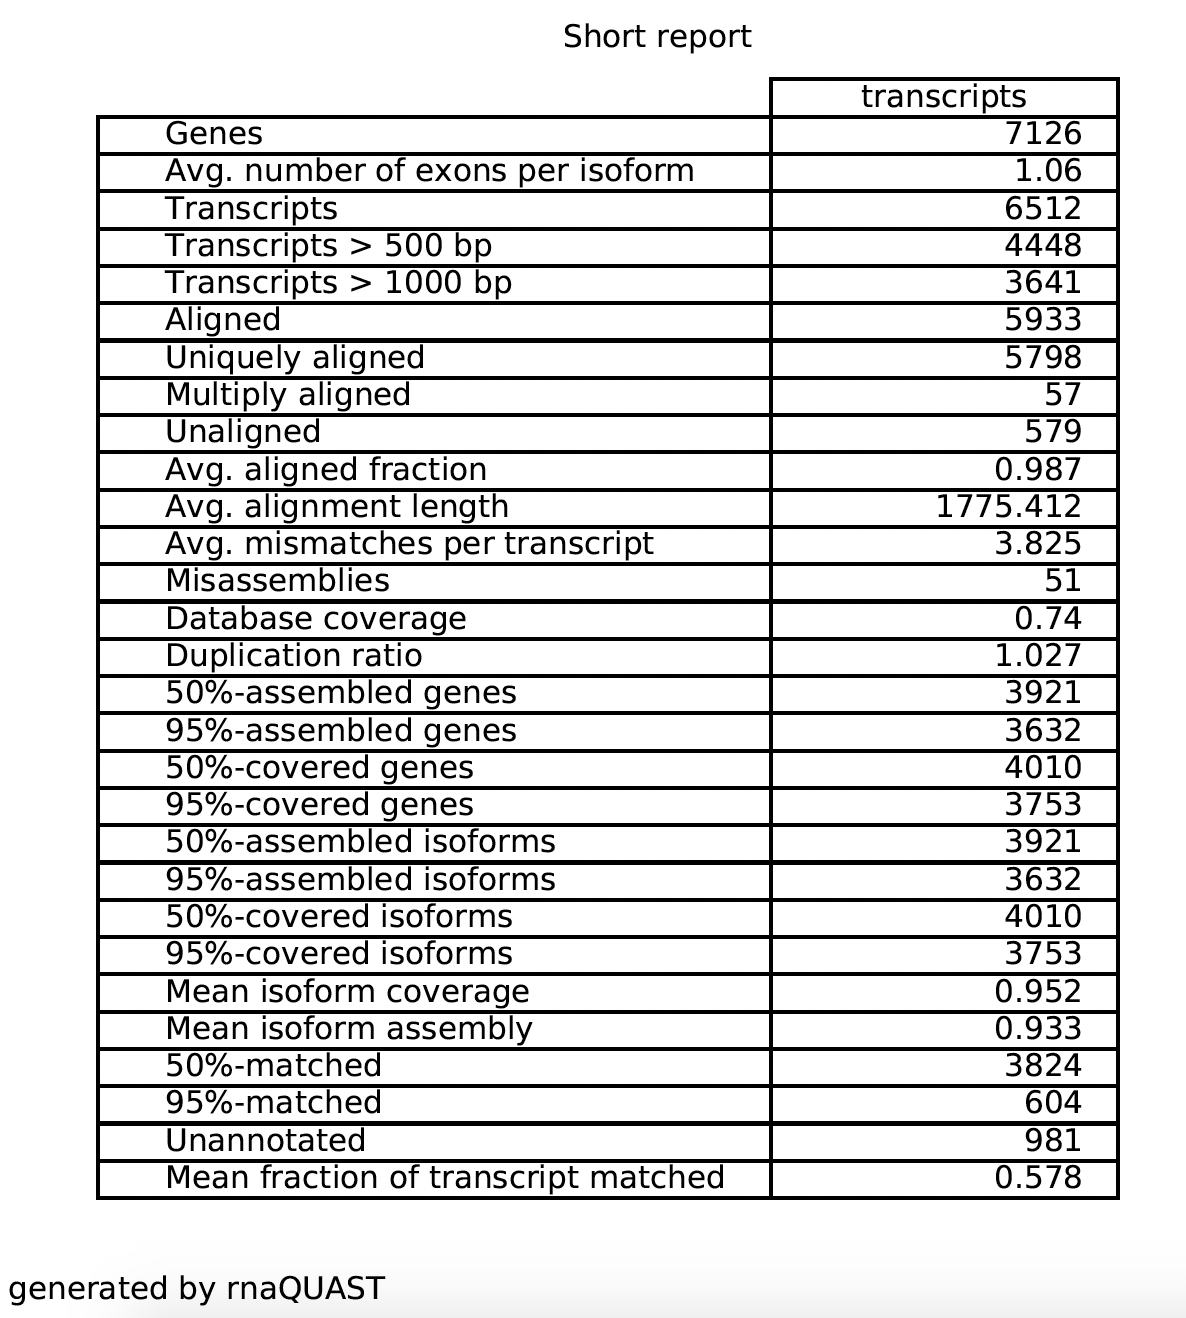

##Сравним полученные результаты

По результатам работы rnaQUAST, у нас 4010 50%-покрытых генов и 3753 на 95% из 7126 всего.

TMPCalculator дал нам 3942 гена с TMP > 20, 6445 c TMP > 5.

Заметим, что гены, которые покрытые хотя бы на 95 процентов, составляют половину от экспрессирующихся генов.